In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [2]:

X, Y = load_planar_dataset()

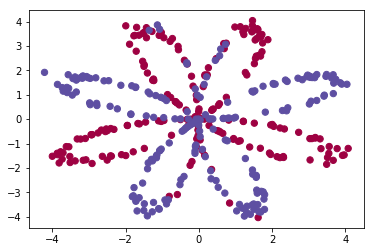

In [3]:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)

In [4]:

shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  


print ("X的维度为: " + str(shape_X))
print ("Y的维度为: " + str(shape_Y))
print ("数据集里面的数据有：" + str(m) + " 个")

X的维度为: (2, 400)
Y的维度为: (1, 400)
数据集里面的数据有：400 个


In [5]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

D:\soft\conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\soft\conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


逻辑回归的准确性： 47 % (正确标记的数据点所占的百分比)


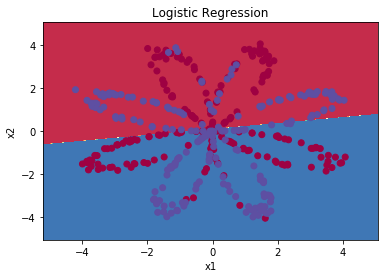

In [6]:
plot_decision_boundary(lambda x: clf.predict(x), X, np.squeeze(Y)) #绘制决策边界
plt.title("Logistic Regression") #图标题
LR_predictions  = clf.predict(X.T) #预测结果
print ("逻辑回归的准确性： %d " % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       "% " + "(正确标记的数据点所占的百分比)")

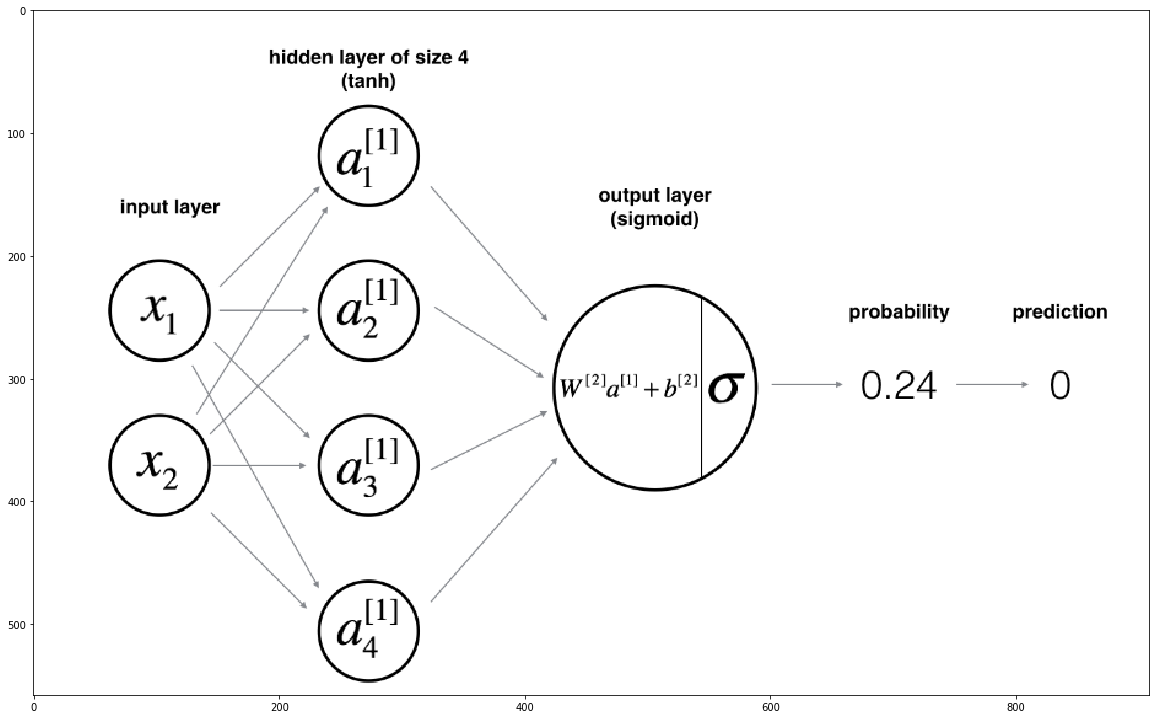

In [8]:
img=Image.open('images/一个隐藏层.png')
plt.figure(figsize=(20,20))
plt.imshow(img)    

In [9]:
#定义层
def layer_sizes(X, Y):
    n_x=X.shape[0]#输入层
    n_h=4#隐藏层
    n_y=Y.shape[0]#输出层
    return n_x,n_h,n_y

In [11]:
#查看
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("输入层: n_x = " + str(n_x))
print("隐藏层: n_h = " + str(n_h))
print("输出层: n_y = " + str(n_y))

输入层: n_x = 5
隐藏层: n_h = 4
输出层: n_y = 2


In [14]:
#定义权重
def initialize_parameters(n_x, n_h, n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros(shape=(n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros(shape=(n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [15]:
#查看
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.00530355 -0.00691661]
 [-0.00396754 -0.00687173]
 [-0.00845206 -0.00671246]
 [-0.00012665 -0.0111731 ]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00234416  0.01659802  0.00742044 -0.00191836]]
b2 = [[0.]]


In [19]:
def forward_propagation(X, parameters):
    #获取参数
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    #
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    assert(A2.shape==(1,X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [20]:
#查看
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.0004997557777419913 -0.0004969633532317802 0.0004381874509591466 0.500109546852431


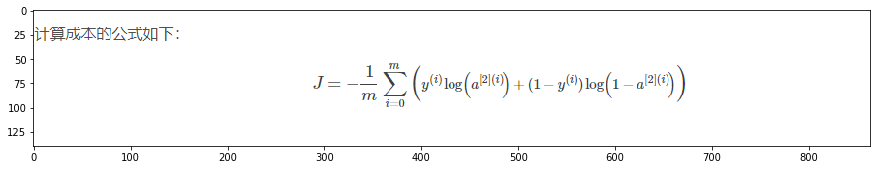

In [22]:
img=Image.open('images/单隐藏层损失函数.png')
plt.figure(figsize=(15,15))
plt.imshow(img)    

In [23]:
#计算损失函数
def compute_cost(A2, Y, parameters):
    #样本数量
    m=Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    log_cost=np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2))
    cost=-np.sum(log_cost)/m
    
    
    cost=np.squeeze(cost)
    assert(isinstance(cost, float))
    
    return cost
    
    
    

In [24]:
#查看
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


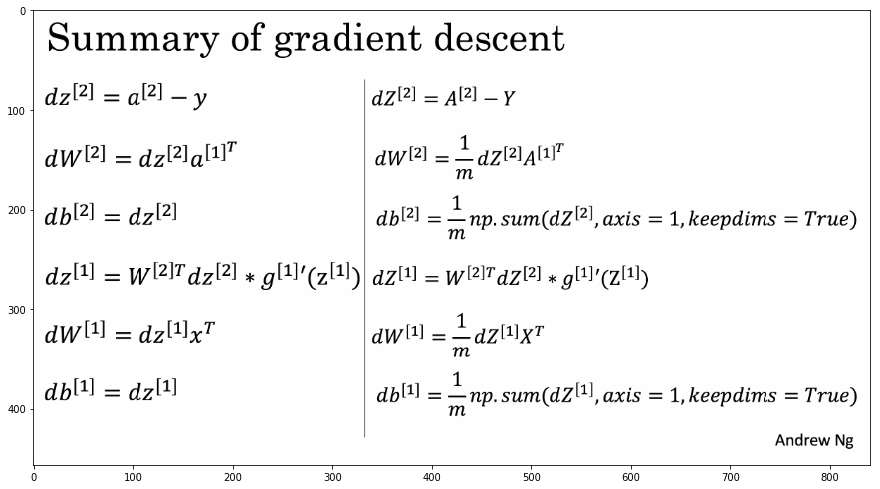

In [29]:
#图片源自Andrew Ng
#用于计算反向传播
img2=Image.open('images/Backpropagation.png')
plt.figure(figsize=(15,15))
plt.imshow(img2)

In [31]:
#反向传播
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
 
    A1 = cache['A1']
    A2 = cache['A2']

    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [32]:
#查看
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [33]:
#更新参数
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
 
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    

In [34]:
#查看

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [35]:
#整合
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    
    np.random.seed(3)
    
    #输入与输出层数
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    #根据层数初始化权重！
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    #开始迭代
    for i in range(0, num_iterations):
        #前向传播
        A2, cache = forward_propagation(X, parameters)
        
        #计算代价函数
        cost = compute_cost(A2, Y, parameters)
 
        #反向传播
        grads = backward_propagation(parameters, cache, X, Y)
 
        #更新参数
        parameters = update_parameters(parameters, grads)

        #true的时候可以方便查看cost
        if print_cost and i % 1000 == 0:
            print ("迭代后cost %i: %f" % (i, cost))

    return parameters

In [36]:
#查看
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

D:\soft\conda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Tempest\1Ng\planar_utils.py:25: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[ 7.52967743 -1.24311138]
 [ 4.19446683 -5.32542016]
 [-7.52968614  1.2431309 ]
 [ 4.02936019 -5.48900933]]
b1 = [[-3.79473784]
 [-2.32994941]
 [ 3.79479657]
 [-2.27016982]]
W2 = [[ 6007.19761951  6033.57548633 -6007.41880563  6031.85805428]]
b2 = [[-52.74316002]]


In [37]:
#预测。
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [38]:
#查看
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("平均值 = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220619
Cost after iteration 8000: 0.219398
Cost after iteration 9000: 0.218482
predictions shape(1, 400)
Y shape(1, 400)
准确率： 90 % 


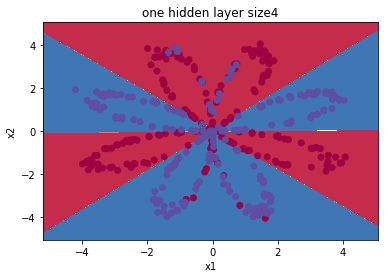

In [45]:
# 建立模型
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

# 绘图
plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
#plt.title中文不好显示
plt.title("one hidden layer size"+str(4))

predictions = predict(parameters, X)

print("predictions shape"+str(predictions.shape))
print("Y shape"+str(Y.shape))


print ("准确率： %d " % float((np.dot(Y, predictions.T) + np.dot(1 - Y,1 - predictions.T)) / float(Y.size) * 100) +"% ")

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.5 %
Accuracy for 100 hidden units: 91.0 %


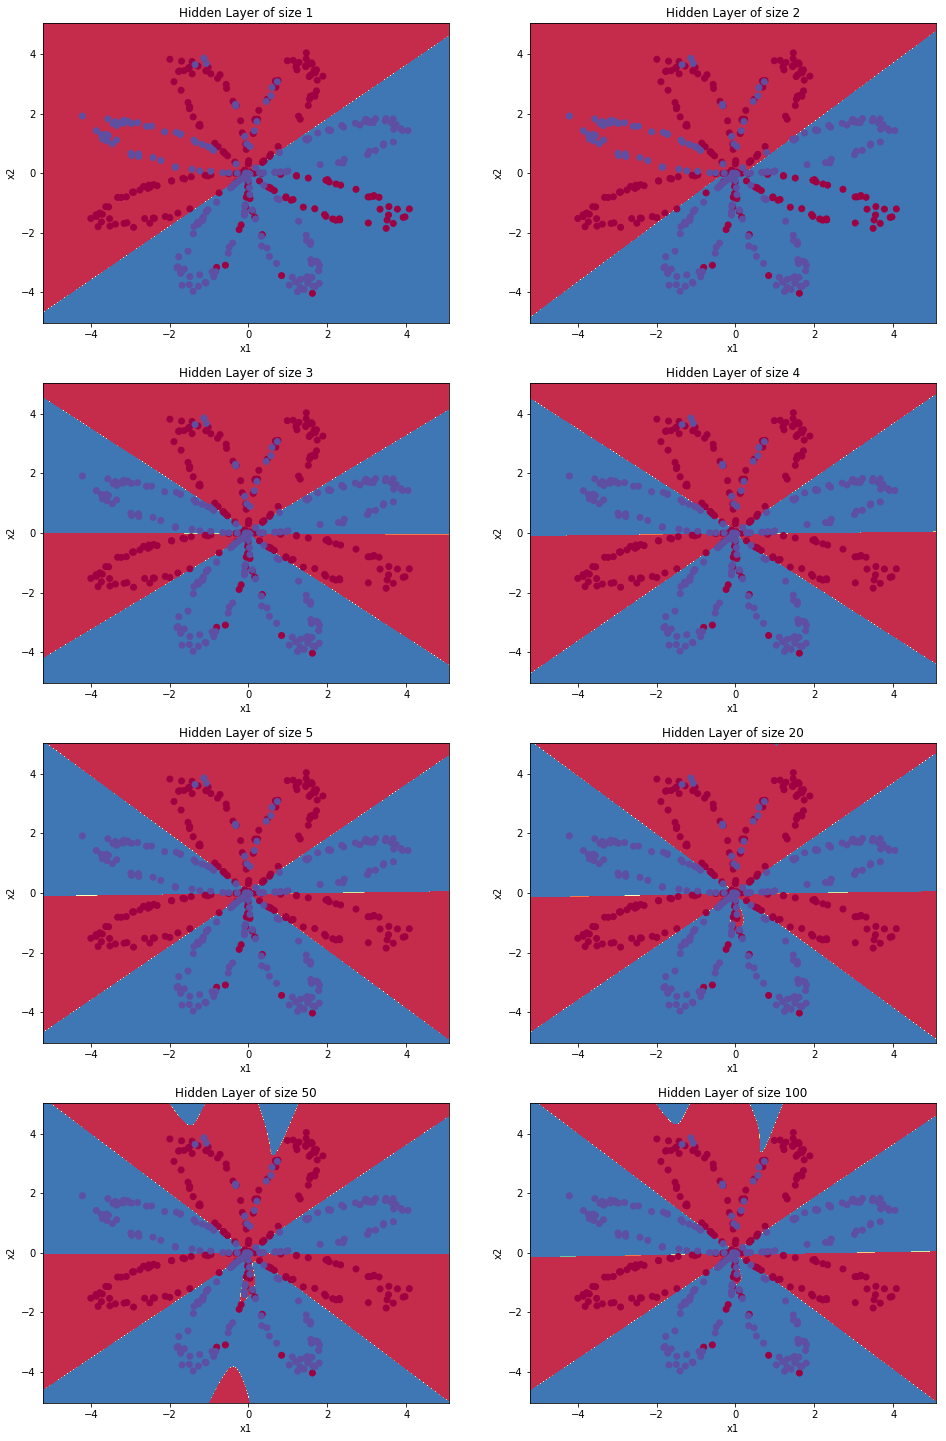

In [49]:

#更改隐藏层的节点，查看一下
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50,100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    